<a href="https://colab.research.google.com/github/Chefiona/practices/blob/master/covid19_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As for a natural language processing practice, I use the following open source corpus in this notebook. 

Fraser, Nicholas; Kramer, Bianca (2020): covid19_preprints. figshare. Software. https://doi.org/10.6084/m9.figshare.12033672.v14

In [117]:
import pandas as pd
df = pd.read_csv("covid19_preprints.csv")
df.head()


,source,doi,arxiv_id,posted_date,title,abstract
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ACE-2 in the highlight of COVID-19, A proposed...",<p>Pneumonia caused by the novel corona virus ...
1,AfricArXiv (OSF),10.31730/osf.io/b7eqj,NaN,2020-04-28,Covid-19 et handicap mental/Autisme et autres ...,<p>The Covid-19 is challenging our health syst...
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,Ghana’s Preparedness Now and For Future Pandemics,<p>The future of nations in the face of the ra...
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,PSYCHOLOGICAL DISTRESS EXPERIENCES OF NIGERIAN...,<p>This study examined the psychological distr...
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,THE CAUSE OF PANIC AT THE OUTBREAK OF COVID-19...,<p>Lack of proper messaging at an outbreak of ...


In [118]:
df.shape

(7380, 6)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       7380 non-null   object
 1   doi          6663 non-null   object
 2   arxiv_id     717 non-null    object
 3   posted_date  7380 non-null   object
 4   title        7380 non-null   object
 5   abstract     5449 non-null   object
dtypes: object(6)
memory usage: 346.1+ KB


In [120]:
#check if there are any missing values
df.isna().sum()

source            0
doi             717
arxiv_id       6663
posted_date       0
title             0
abstract       1931
dtype: int64

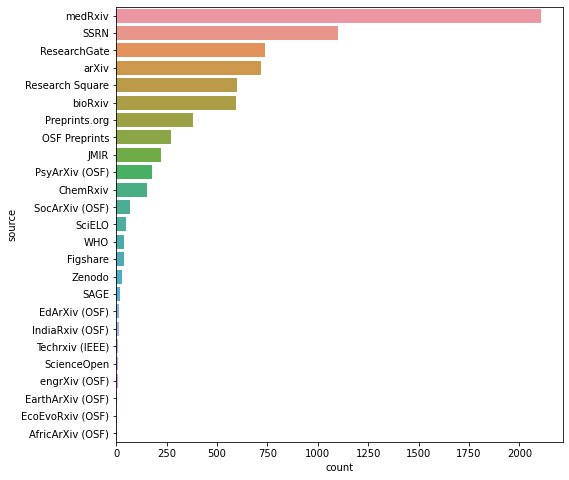

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,8))
ax = sns.countplot (y = "source", data=df, order=df.source.value_counts().iloc[:25].index)

In [122]:
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

common_words = set(stopwords.words('english'))

#remove non-semantically essential words in text
def abstract_clean(mytext):
  mytext = word_tokenize(mytext)
  mytext = [word.lower() for word in mytext if word.isalpha()]
  punct_sub = str.maketrans('', '', string.punctuation)
  mytext = [word.translate(punct_sub) for word in mytext]
  mytext = [word for word in mytext if not word in common_words ]
  return mytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# change the datatype in abstract to str
df['abstract'] = df['abstract'].astype('str')
# cleasning the abstract
df['abstract'] = df['abstract'].apply(abstract_clean)

In [0]:
# find common lexical elements
from collections import Counter

def lex_counting(mytext):
  counts = Counter()
  for lexs in mytext:
    for lex in lexs:
      counts[lex] += 1
  return counts 



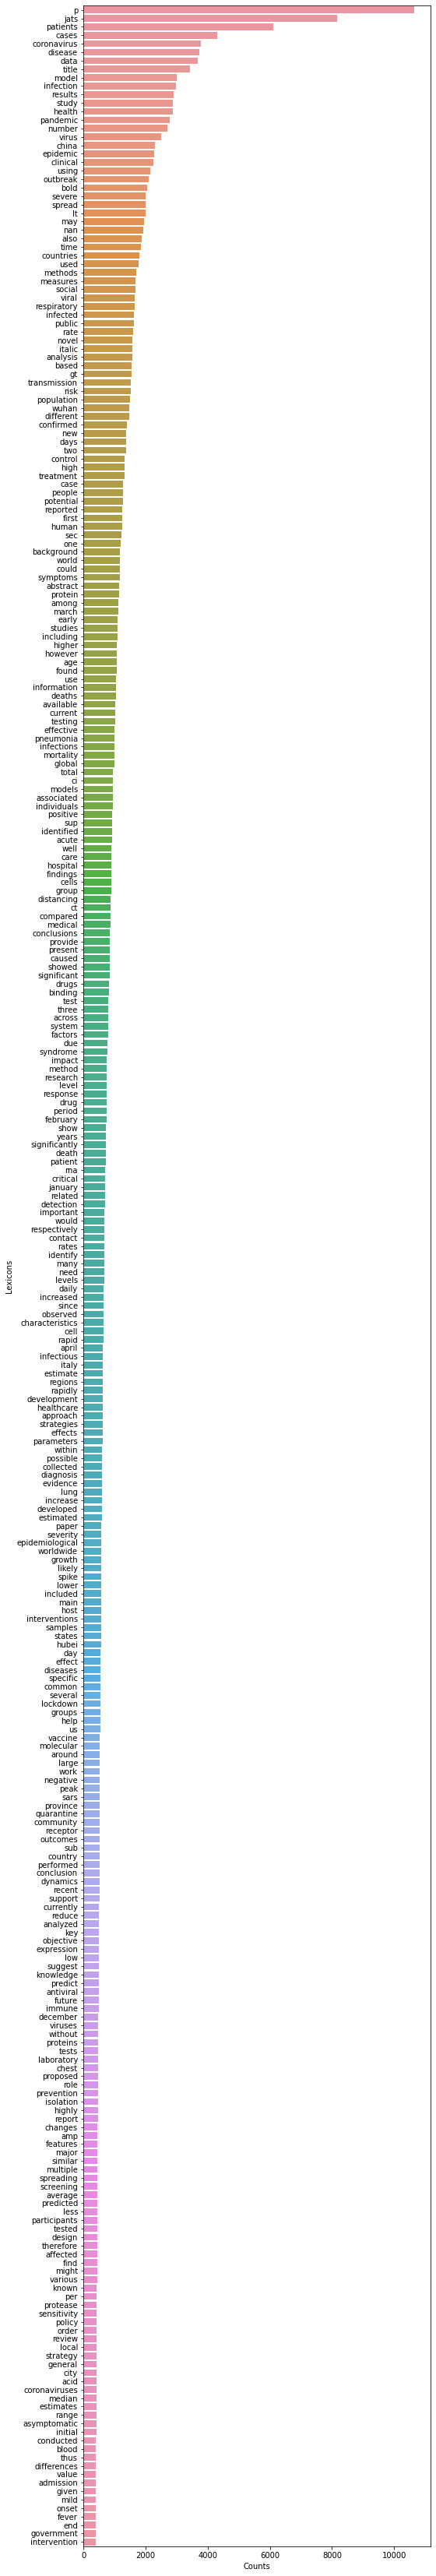

In [126]:
# counting the most frequent lexical elements in covid-19 pendamic studies
lex_counts = lex_counting(df['abstract'])
frequent_covid_lex = lex_counts.most_common(300)
frequent_covid_lex = pd.DataFrame(frequent_covid_lex, columns=['Lexicons','Counts'])
plt.figure(figsize=(8,60))
sns.barplot(y = 'Lexicons', x='Counts', data=frequent_covid_lex)